In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image
import os

In [2]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [38]:
DIR = '../data/raw/TopDown/max/STD'
IMAGES = sorted(glob.glob(os.path.join(DIR, '*.tiff')), key=numericalSort)
IMAGES

['../data/raw/TopDown/max/STD\\max_variance_image_1.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_2.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_3.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_4.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_5.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_6.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_7.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_8.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_9.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_10.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_11.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_12.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_13.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_14.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_15.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_16.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image

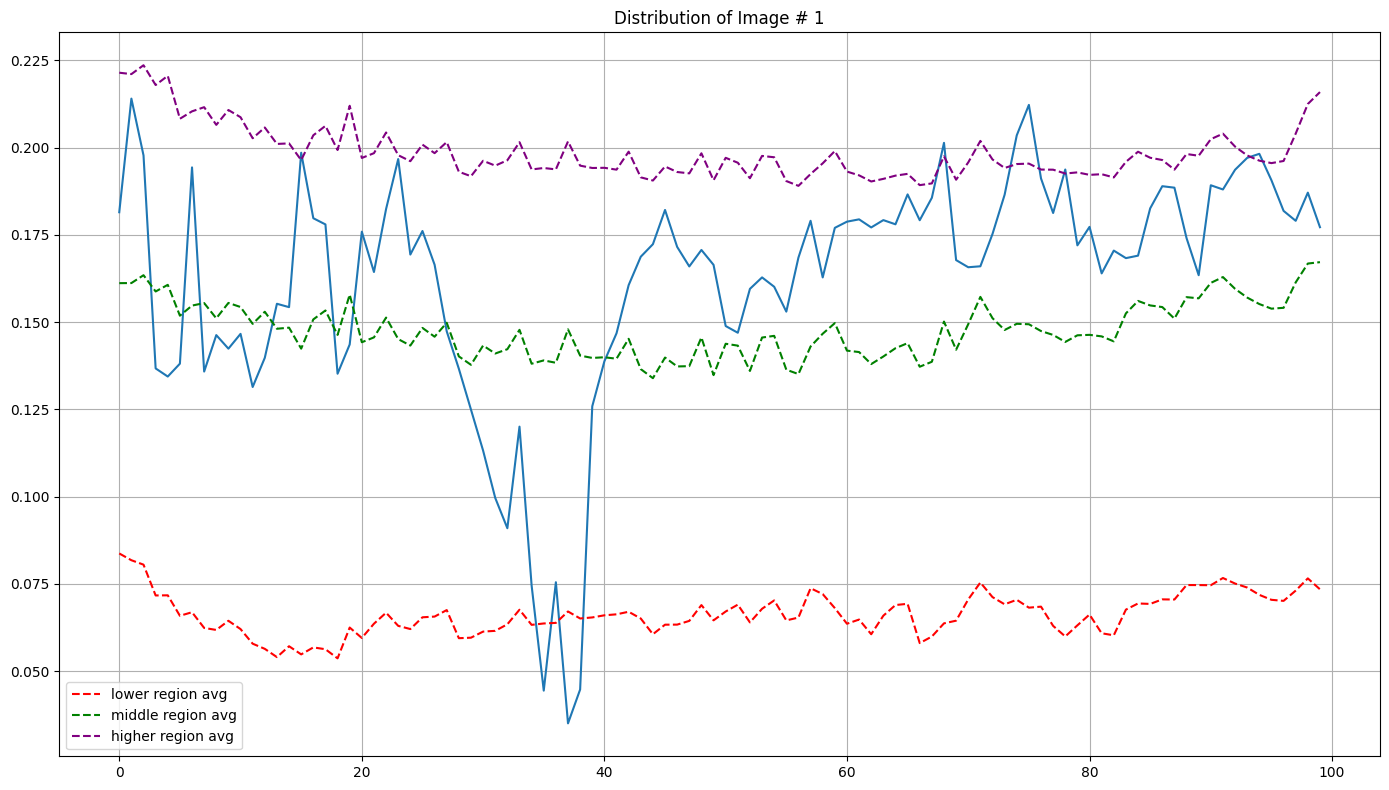

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
# Assume image_stack is a NumPy array with shape (H, W, D)
# Example: image_stack = np.load('your_data.npy')  # shape: (H, W, D)
# for img_path in IMAGES:
#     image = np.array(Image.open(img_path))
#     image_stack = []
#     result = np.zeros((1024, 1024))
#     for i in range(1024):
#         for j in range(1024):
#             # print(layer_number, image[584][425])
#             image_stack.append(image[i][j])

image_stack = []
image_average = []
image_average2 = []
image_average3 = []
layer_number = 1
for img_path in IMAGES:
    image = np.array(Image.open(img_path))
    # Compute histogram
    counts, bin_edges = np.histogram(image)

    # Midpoints of bins for averaging
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Split into 3 equal regions
    n = len(bin_centers)
    split_size = n // 3

    region1 = counts[:split_size]
    region2 = counts[split_size:2*split_size]
    region3 = counts[2*split_size:]

    centers1 = bin_centers[:split_size]
    centers2 = bin_centers[split_size:2*split_size]
    centers3 = bin_centers[2*split_size:]

    # Weighted average of each region (using bin centers)
    avg1 = np.average(centers1, weights=region1)
    avg2 = np.average(centers2, weights=region2)
    avg3 = np.average(centers3, weights=region3)

    image_average.append(np.mean(avg1))
    image_average2.append(np.mean(avg2))
    image_average3.append(np.mean(avg3))

    # print(layer_number, image[634][404])
    image_stack.append(image[169][444])
    layer_number += 1

# print(min(image_stack), max(image_stack))
# Visualizing feature distributions
plt.figure(figsize=(14, 8))
# for idx, img in enumerate(image_stack):
# plt.subplot(1, 1, 1 + 1)
plt.plot(np.array(image_stack).reshape(-1, 1))
plt.plot(np.array(image_average).reshape(-1, 1), color='red', linestyle='--', label='lower region avg')
plt.plot(np.array(image_average2).reshape(-1, 1), color='green', linestyle='--', label='middle region avg')
plt.plot(np.array(image_average3).reshape(-1, 1), color='purple', linestyle='--', label='higher region avg')
plt.title(f'Distribution of Image # {1}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()